# Telco Classification Project

Goal:

* To find out the biggest driver of churn in Telco

## Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import my own acquire module
import env
import acquire
import wrangle

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting the models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Acquire

* Data acquired from Codeup SQL database.
* I imported the data using SQL commands into my python program.
* I acquired my data on the first day of my project.
* The raw data has 23 columns and 7,043 rows.
* Each row or observation is specific to a Telco customer.
* Each column represents a feature containing data specific to each of Telco's customers.

In [2]:
from wrangle import get_telco_data
telco = get_telco_data()
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Prepare

* Dropped duplicate columns
* Dropped null values stored as whitespace 
* Converted to correct datatype (float)
* Converted binary categorical variables to numeric (encoded)
* Got dummies for non-binary categorical variables
* Concatenated dummy dataframe to original
* Dropped more duplicate columns
* Split the data
* - split the data into train, validate, and test
* Returned the split, clean data

In [3]:
# Importing the prepare function and using it to clean the data.
from wrangle import prep_telco_data
train, validate, test = prep_telco_data(telco)
train.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0


In [4]:
train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'paperless_billing_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic chec

## Explore

                    Initial Questions
\
\
\
Question 1: Is tenure associated with monthly charges as a driver of churn?


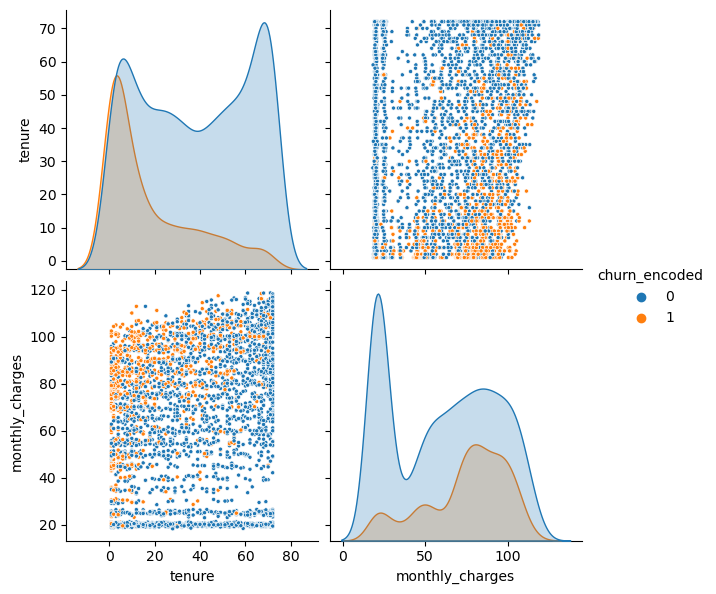

In [5]:
#Get pairplot chart
col = train[['tenure', 'monthly_charges']]
            
sns.pairplot(data = train, vars=col, hue = 'churn_encoded', markers='.', size=(3))
plt.show()

The location and saturation of 'Yes' churns in the above graph show correlation of churn in customers with low 'tenure' and higher 'monthly charges'.

Next I used a chi-square test to compare the categorical features of 'tenure' and 'monthly charges'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between tenure and churn.\
$H_A$ There is a significant association between tenure and churn.

In [6]:
#Get chi-test results
from wrangle import get_chi_tenure
get_chi_tenure(train)

chi^2 = 626.7233
p     = 0.0000
We reject H₀:There is no association between tenure and churn


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between Tenure and Churn.****

**Question 2: Does contract type significantly affect churn?**

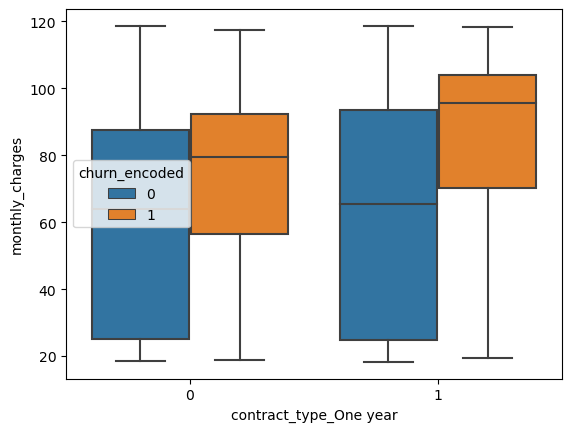

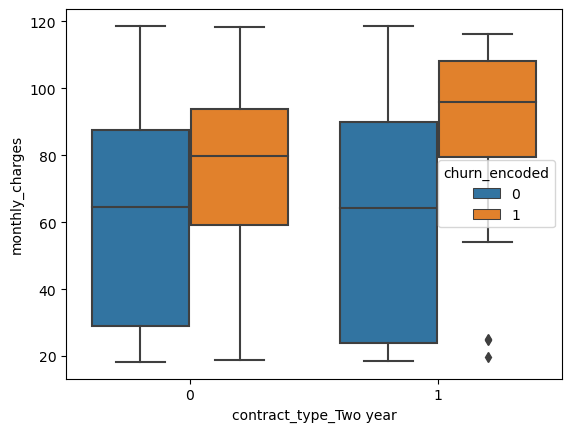

In [7]:
sns.boxplot(data = train, y = train.monthly_charges, x = 'contract_type_One year', hue = 'churn_encoded')
plt.show()
sns.boxplot(data = train, y = train.monthly_charges, x = 'contract_type_Two year', hue = 'churn_encoded')
plt.show()

The above boxplot appears to show that there may be a difference in 'churn' than 'no churn' and that  there could be something to look at here.
Next I used a chi-square test to compare the categorical features of 'contract_type_One year' and 'contract_type_One year'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between churn in one year and two year contracts.\
$H_A$ There is a significant association between churn in one year and two year contracts.

In [8]:
#Get chi-test results
from wrangle import get_chi_contracts
get_chi_contracts(train)

chi^2 = 328.3907
p     = 0.0000
We reject H₀:There is no association between one year and two year contracts and churn


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between churn in one year and two year contracts.****

**Question 3: Does the feature 'partner' significantly affects churn?**

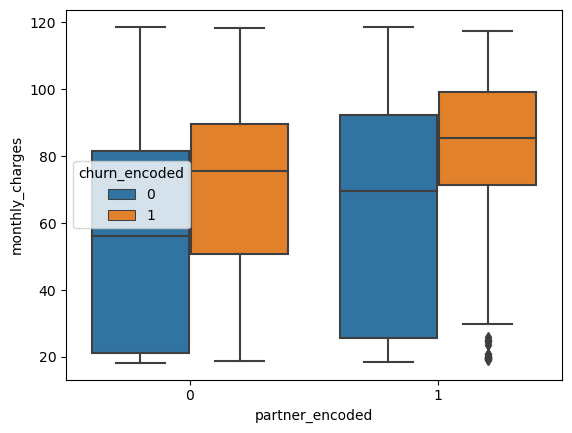

In [9]:
sns.boxplot(data = train, y = train.monthly_charges, x = train.partner_encoded, hue = 'churn_encoded')
plt.show()

The above boxplot appears to show that 'partner' could be a driver and that  there could be something to look at here.
Next I used a chi-square test to compare the features of 'partner' and 'churn'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between churn and partner.\
$H_A$ There is a significant association between churn and partner.

In [10]:
#Get chi-test results
from wrangle import get_chi_partner
get_chi_partner(train)

chi^2 = 80.0893
p     = 0.0000
We reject H₀:There is no association between churn and partner


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between churn and partner.****

**Question 4: Does the feature 'dependents' significantly affects churn?**

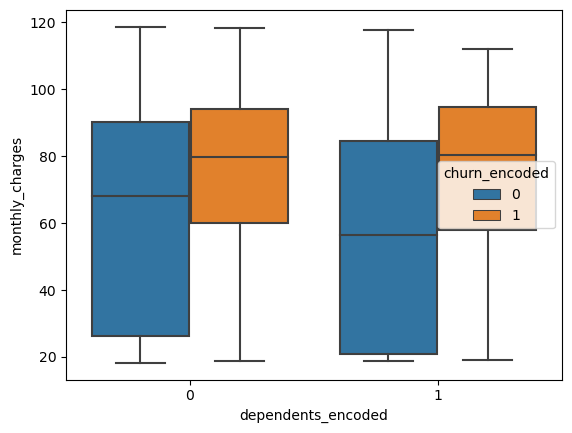

In [11]:
sns.boxplot(data = train, y = train.monthly_charges, x = train.dependents_encoded, hue = 'churn_encoded')
plt.show()

The above boxplot appears to show that 'dependents' could be a driver and that  there could be something to look at here.
Next I used a chi-square test to compare the features of 'dependents' and 'churn'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between churn and dependents.\
$H_A$ There is a significant association between churn and dependents.

In [12]:
#Get chi-test results
from wrangle import get_chi_dependents
get_chi_dependents(train)

chi^2 = 104.5425
p     = 0.0000
We reject H₀:There is no association between churn and dependents


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between churn and dependents.****

## Exploration Summary

* I conducted the same routine for all four questions since the data provided are all quite similar. 
* There were a ton of features that could all have impacted churn, but during exploration, I chose four features that I thought would have the biggest impact against churn.
* Utilizing the chi-test, I found that all four features have a significant relationship with churn and so I will move forward with all selected features and run them through various models in the next stage.

# Modeling

### Introduction

* I will be evaluating my train, validate, and test data using three models: Decision Tree, Logistic Regression, and Random Forest to see
which model I should move forward with.

* I chose to use precision as my evaluation metric because I want to know how good my model's positive predictions were; false negatives are "free", but false positives are costly.

* I calculate my baseline my getting the mean of the largest portion of my target "churn_encoded" which happened to be "no". 

In [18]:
baseline_accuracy = (train.churn_encoded == 0).mean()
baseline_accuracy
#Evaluation Metric : Precision

0.7343154686309372

## Best 3 Models

### Model #1: Decision Tree

In [14]:
from wrangle import get_decision_tree
get_decision_tree()

Accuracy of Decision Tree on train data is 0.794005588011176
Accuracy of Decision Tree on validate data is 0.7760663507109005


### Model #2: Logistic Regression

In [15]:
from wrangle import get_logistic_regression
get_logistic_regression()

Accuracy of Logistic Regression classifier on training set: 0.33
Accuracy of Logistic Regression classifier on validate set: 0.38


### Model #3: Random Forest

In [16]:
from wrangle import get_random_forest
get_random_forest()

Accuracy of random forest classifier on training set: 0.79
Accuracy of random forest classifier on validate set: 0.77


### After running my training and validate data through the three models, it appears that Logistic Regression had the lowest accuracy overall.
### Decision Tree and Random Forest were both tied for training and validation, so it's a pick em' at this point. I have decided to go with Random Forest for my test model.

# Test Model - Random Forest

In [17]:
from wrangle import get_random_forest_test
get_random_forest_test()

Accuracy of random forest classifier on test set: 0.79


### Modeling Wrap 
* Random Forest's test data, after being run through Random Forest, proved to hold true with an accuracy of 79%, ultimately beating the baseline by 6%. 

## Conclusion

### Summary
* Overall, my intial look at the data provided led me to ask questions regarding how the individual features (columns) were potentially affecting the target (churn). I found that there could be any number of features that had some impact on churn, so I looked at a few that were likely the biggest drivers.
* I found that 'tenure', one-year 

### Recommendations
* I would definitely recommend further evaluation and consideration into the one and two-year contracts currently provided to customers and find a way to retain those who have low tenure. A possible solution could be giving satiable incentives that reduce a customers monthly bill the longer a customer stays.

### Next Steps
* As a Data Scientist, if given more time to work on this project, I would dig further into ALL of my individual features, conducting more than just the chi-tests and I'd also include other models in my testing to see what comes out of it.